<a href="https://colab.research.google.com/github/ShivamGupta-5703/Data-Mining-Lab/blob/main/Lab7_Unsupervised_Learning_on_CountryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.0 MB/s eta 0:00:00


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

In [81]:
df=pd.read_csv(r"/content/drive/MyDrive/Data Mining/Lab7/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [83]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [84]:
df.count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [85]:
print(df.isnull().sum() , '\n')

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64 



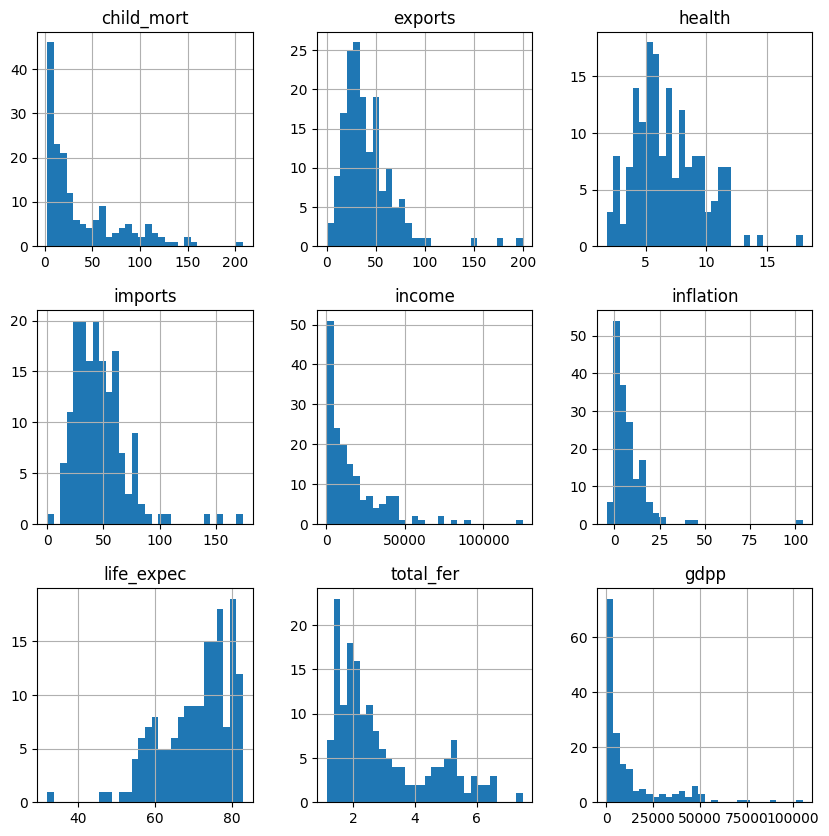

In [86]:
df.hist(bins=30,figsize=(10,10));

<ipython-input-87-18cfa96ff6bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


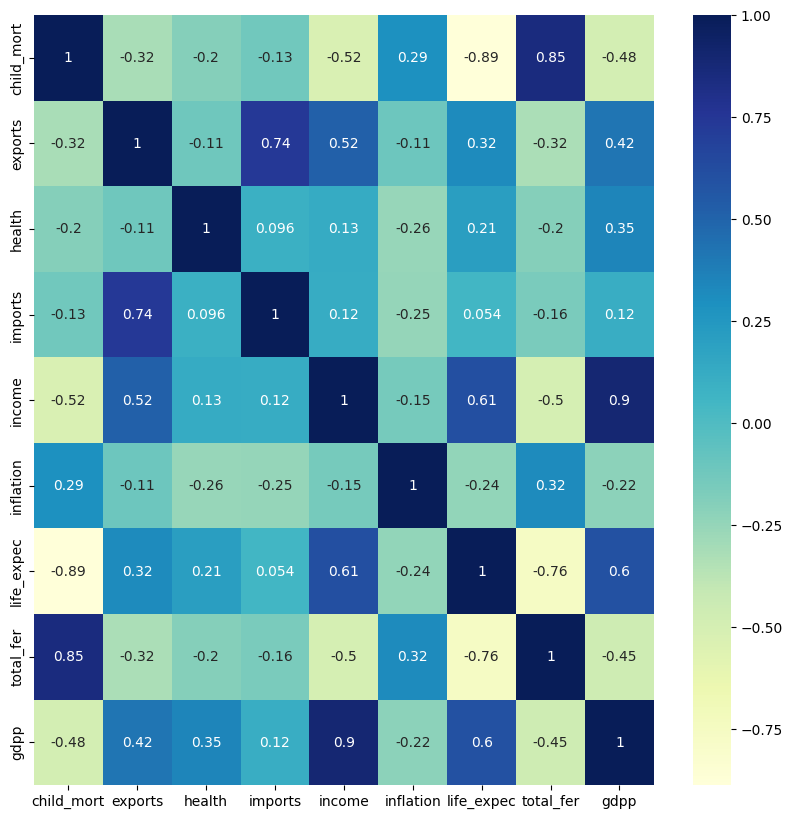

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [88]:
country = pd.DataFrame(df['country'])
df.drop(labels='country' , axis=1 , inplace=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [89]:
scaler=StandardScaler()
scaler.fit(df)
set_scaled=scaler.transform(df)

In [90]:
pca=PCA(n_components=2,random_state=0)
x_pca=pca.fit_transform(set_scaled)
data_pca = pd.DataFrame(x_pca)

Text(0, 0.5, 'PC2')

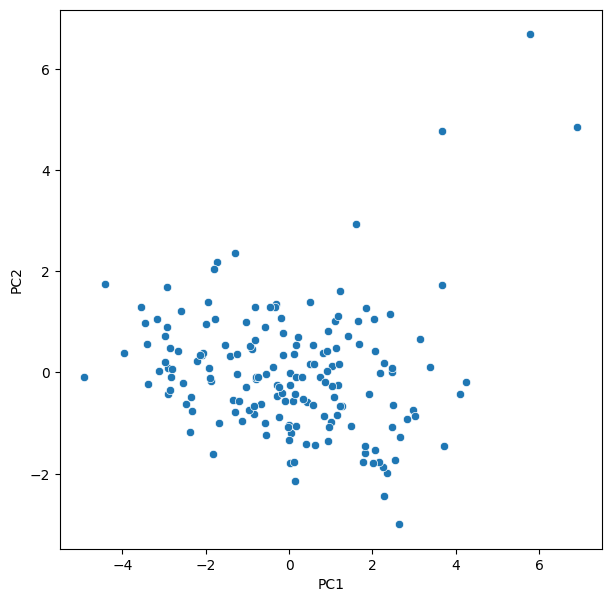

In [91]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca[0],y=data_pca[1])
plt.xlabel("PC1")
plt.ylabel("PC2")

# K-Means Clustering -->

In [92]:
kmeans=KMeans(n_clusters=2,random_state=2)
kmeans.fit(set_scaled)
df["kmean_labels"] = kmeans.predict(set_scaled)
df["kmean_labels"].value_counts()
df["kmean_labels"] = kmeans.predict(set_scaled)
df["kmean_labels"].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    99
1    68
Name: kmean_labels, dtype: int64

In [93]:
mean = df.groupby("kmean_labels").mean()
median = df.groupby("kmean_labels").median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ["Group0_mean", "Group1_mean", "Group0_median", "Group1_median"]
df_kmeans.T

,Group0_mean,Group1_mean,Group0_median,Group1_median
child_mort,12.161616,76.280882,10.30,65.60
exports,48.603030,30.198515,40.10,24.95
health,7.314040,6.090147,7.04,5.34
imports,49.121212,43.642146,46.20,41.50
income,26017.171717,4227.397059,19400.00,2590.00
inflation,5.503545,11.098750,3.53,8.21
life_expec,76.493939,61.910294,76.40,62.00
total_fer,1.941111,4.413824,1.88,4.58
gdpp,20507.979798,1981.235294,11900.00,1155.00


In [94]:
output= pd.DataFrame({'country': country.country,
                       'kmean_labels': df["kmean_labels"]})
output.head()

,country,kmean_labels
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0


# K-Medoids Clustering -->

In [95]:
kmedoids = KMedoids(n_clusters=2, random_state=2)
kmedoids.fit(set_scaled)
df["kmedoid_labels"] = kmedoids.labels_
df["kmedoid_labels"].value_counts()

0    98
1    69
Name: kmedoid_labels, dtype: int64

In [96]:
mean = df.groupby("kmedoid_labels").mean()
median = df.groupby("kmedoid_labels").median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ["Group0_mean", "Group1_mean", "Group0_median", "Group1_median"]

In [97]:
output = pd.DataFrame({'country': country.country,
                       'kmedoid_labels': df["kmedoid_labels"]})
output.head()

,country,kmedoid_labels
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
